In [1]:
from cmdstanpy import CmdStanModel 
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import stan
import seaborn as sns
import plotly.express as px

plt.style.use("ggplot")  #using style ggplot

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('./cars.csv')
data.head(10)

Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   
5           5  opel  combo      gen-d-2011  2017   121203        1598  Diesel   
6           6  opel  combo      gen-d-2011  2017   119965        1248  Diesel   
7           7  opel  combo      gen-d-2011  2016   201658        1248  Diesel   
8           8  opel  combo      gen-d-2011  2014   178666        1598  Diesel   
9           9  opel  combo      gen-d-2011  2015   113000        1248  Diesel   

              city       province  price  
0            Janki    Mazowieckie  35900  
1         Katowice        Śląskie  78501  
2            Brzeg       Opolskie  27000  
3        Korfantów       Opolskie  30800  
4  Tarnowskie Góry        Śląskie  35900  
5         Warszawa    Mazowieckie  51900  
6          Wrocław   Dolnośląskie  44700  
7           Lublin      Lubelskie  29000  
8           Złotów  Wielkopolskie  28900  
9         Strzyżew    Mazowieckie  34900

In [3]:
print(data.mark.unique())

['opel' 'audi' 'bmw' 'volkswagen' 'ford' 'mercedes-benz' 'renault'
 'toyota' 'skoda' 'alfa-romeo' 'chevrolet' 'citroen' 'fiat' 'honda'
 'hyundai' 'kia' 'mazda' 'mini' 'mitsubishi' 'nissan' 'peugeot' 'seat'
 'volvo']


In [4]:
print(data.loc[(data['mark'] == 'bmw')].model.unique())

['3gt' '5gt' 'i3' 'm2' 'm3' 'm4' 'm5' 'm8' 'seria-1' 'seria-2' 'seria-3'
 'seria-4' 'seria-5' 'seria-6' 'seria-7' 'seria-8' 'x1' 'x2' 'x3' 'x4'
 'x5' 'x5-m' 'x6' 'x6-m' 'x7']


In [5]:
segments = {
    "A": ['i3'],
    "C": ['seria-1', 'seria-2', 'm2'],
    "D": ['seria-3', 'seria-4', 'm4', 'm3', '3gt'],
    "E": ['seria-5', 'seria-8', 'm8', 'm5', '5gt', 'x6', 'x6-m', 'x5-m'],
    "F": ['seria-7', 'x7'],
    "G": ['seria-6'],
    "I": ['x1', 'x2', 'x3', 'x4', 'x5'],
}
segments_invert = {}
for key, value in segments.items():
    for val in value:
        segments_invert[str(val)] = key
segments_invert

{'i3': 'A',
 'seria-1': 'C',
 'seria-2': 'C',
 'm2': 'C',
 'seria-3': 'D',
 'seria-4': 'D',
 'm4': 'D',
 'm3': 'D',
 '3gt': 'D',
 'seria-5': 'E',
 'seria-8': 'E',
 'm8': 'E',
 'm5': 'E',
 '5gt': 'E',
 'x6': 'E',
 'x6-m': 'E',
 'x5-m': 'E',
 'seria-7': 'F',
 'x7': 'F',
 'seria-6': 'G',
 'x1': 'I',
 'x2': 'I',
 'x3': 'I',
 'x4': 'I',
 'x5': 'I'}

In [6]:
data = data.loc[(data['mark'] == 'bmw')]
data

Unnamed: 0 mark model generation_name  year  mileage  vol_engine  \
23945       23945  bmw   3gt             NaN  2015   330000        1995   
23946       23946  bmw   3gt             NaN  2017    79665        1995   
23947       23947  bmw   3gt             NaN  2014    79160        1995   
23948       23948  bmw   3gt             NaN  2015   223000        1995   
23949       23949  bmw   3gt             NaN  2018   179000        1995   
...           ...  ...   ...             ...   ...      ...         ...   
35010       35010  bmw    x7             NaN  2020    44000        2998   
35011       35011  bmw    x7             NaN  2021        5        2993   
35012       35012  bmw    x7             NaN  2021    30000        2993   
35013       35013  bmw    x7             NaN  2021       20        4395   
35014       35014  bmw    x7             NaN  2021        1        2993   

           fuel       city      province   price  
23945    Diesel    Leżajsk  Podkarpackie   57900  
23946    Diesel    Rzeszów  Podkarpackie  142000  
23947    Diesel  Nieciszów  Dolnośląskie   91700  
23948    Diesel  Nowy Sącz   Małopolskie   54900  
23949    Diesel      Płock   Mazowieckie   92700  
...         ...        ...           ...     ...  
35010  Gasoline      Płock   Mazowieckie  369000  
35011    Diesel   Katowice       Śląskie  552300  
35012    Diesel   Katowice       Śląskie  552300  
35013  Gasoline    Mikołów       Śląskie  701400  
35014    Diesel   Warszawa   Mazowieckie  549190  

[11070 rows x 11 columns]

In [7]:
#checking null value 
data.isna().sum()


Unnamed: 0            0
mark                  0
model                 0
generation_name    1600
year                  0
mileage               0
vol_engine            0
fuel                  0
city                  0
province              0
price                 0
dtype: int64

In [8]:
data.drop(columns="generation_name",inplace=True) #dropping 

#checking null value 
data.isna().sum()

Unnamed: 0    0
mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [9]:
data['model_types'] = data['model'].replace(segments_invert)
data

Unnamed: 0 mark model  year  mileage  vol_engine      fuel       city  \
23945       23945  bmw   3gt  2015   330000        1995    Diesel    Leżajsk   
23946       23946  bmw   3gt  2017    79665        1995    Diesel    Rzeszów   
23947       23947  bmw   3gt  2014    79160        1995    Diesel  Nieciszów   
23948       23948  bmw   3gt  2015   223000        1995    Diesel  Nowy Sącz   
23949       23949  bmw   3gt  2018   179000        1995    Diesel      Płock   
...           ...  ...   ...   ...      ...         ...       ...        ...   
35010       35010  bmw    x7  2020    44000        2998  Gasoline      Płock   
35011       35011  bmw    x7  2021        5        2993    Diesel   Katowice   
35012       35012  bmw    x7  2021    30000        2993    Diesel   Katowice   
35013       35013  bmw    x7  2021       20        4395  Gasoline    Mikołów   
35014       35014  bmw    x7  2021        1        2993    Diesel   Warszawa   

           province   price model_types  
23945  Podkarpackie   57900           D  
23946  Podkarpackie  142000           D  
23947  Dolnośląskie   91700           D  
23948   Małopolskie   54900           D  
23949   Mazowieckie   92700           D  
...             ...     ...         ...  
35010   Mazowieckie  369000           F  
35011       Śląskie  552300           F  
35012       Śląskie  552300           F  
35013       Śląskie  701400           F  
35014   Mazowieckie  549190           F  

[11070 rows x 11 columns]

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


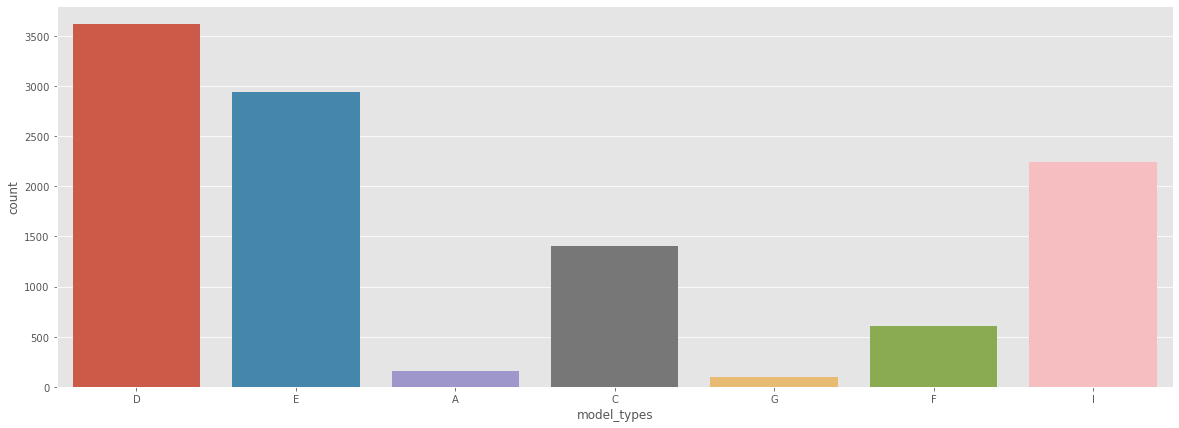

In [10]:
# how much repeat type models  in the dataset

plt.figure(figsize=(20,7))
sns.countplot(data["model_types"])
plt.show()

In [11]:
# let`s show correlation the price and the years - using interactive graph  

px.scatter(data, x="year", y="price", animation_frame="model_types", color="fuel")

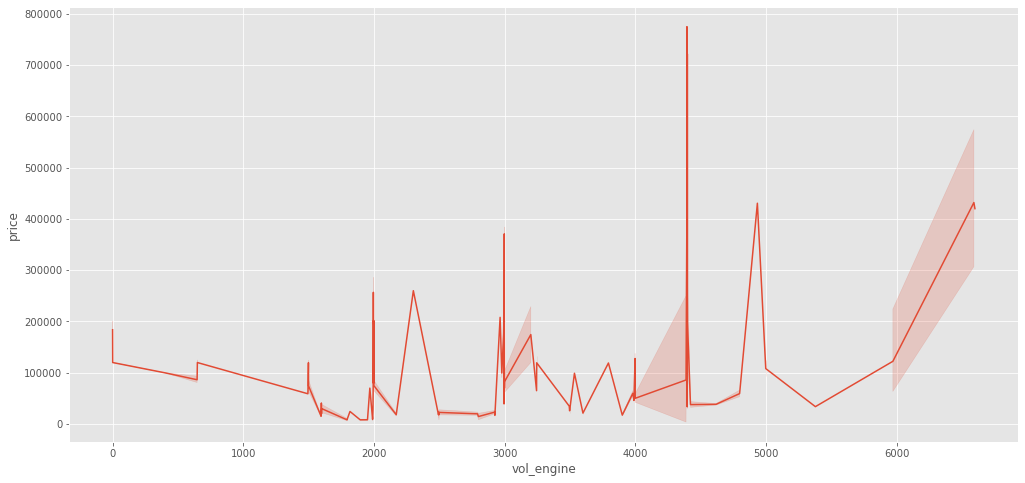

In [12]:
# let see how change the price for this vol_engine  
plt.figure(figsize=(17,8))
sns.lineplot(data=data,x="vol_engine",y="price")
plt.show()

In [13]:
data = data.loc[(data['model_types'] == 'I')]
print(data.loc[(data['mark'] == 'bmw')].model.unique())


['x1' 'x2' 'x3' 'x4' 'x5']


In [14]:
# Standarizing mileage, vol_engine and year
# mileage
mean_mileage = data.mileage.mean()
std_mileage = data.mileage.std()

data['c_mileage'] = data.mileage - mean_mileage
data['s_mileage'] = (data.mileage - mean_mileage)/std_mileage

# vol_engine
mean_vol_engine = data.vol_engine.mean()
std_vol_engine = data.vol_engine.std()
data['c_vol_engine'] = data.vol_engine - mean_vol_engine
data['s_vol_engine'] = (data.vol_engine - mean_vol_engine)/std_vol_engine

# year
mean_year = data.year.mean()
std_year = data.year.std()
data['c_year'] = data.year - mean_year
data['s_year'] = (data.year - mean_year)/std_year

mean_price = data.price.mean()
std_price = data.price.std()
data['s_price'] = (data.price - mean_price)/std_price
data.head(10)


/var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/ipykernel_8905/1752578970.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/ipykernel_8905/1752578970.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/ipykernel_8905/1752578970.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Unnamed: 0 mark model  year  mileage  vol_engine      fuel  \
32424       32424  bmw    x1  2009   142000        1995    Diesel   
32425       32425  bmw    x1  2010   159000        1995    Diesel   
32426       32426  bmw    x1  2013    86384        1995    Diesel   
32427       32427  bmw    x1  2010   163000        1995    Diesel   
32428       32428  bmw    x1  2014   172000        1995    Diesel   
32429       32429  bmw    x1  2014    89745        1995    Diesel   
32430       32430  bmw    x1  2011   141239        1995    Diesel   
32431       32431  bmw    x1  2010   131407        1995  Gasoline   
32432       32432  bmw    x1  2011   203000        1995    Diesel   
32433       32433  bmw    x1  2010   399800        1995    Diesel   

                    city            province  price model_types  \
32424          Bydgoszcz  Kujawsko-pomorskie  43900           I   
32425              Lubin        Dolnośląskie  35000           I   
32426           Katowice             Śląskie  58500           I   
32427          Nowy Targ         Małopolskie  61000           I   
32428  Ostrów Mazowiecka         Mazowieckie  56900           I   
32429           Katowice             Śląskie  59900           I   
32430             Kraków         Małopolskie  48000           I   
32431           Warszawa         Mazowieckie  39900           I   
32432            Siedlce         Mazowieckie  41900           I   
32433          Wałbrzych        Dolnośląskie  31500           I   

           c_mileage  s_mileage  c_vol_engine  s_vol_engine   c_year  \
32424   29217.833854   0.287088    -303.30996     -0.494307 -6.26351   
32425   46217.833854   0.454127    -303.30996     -0.494307 -5.26351   
32426  -26398.166146  -0.259383    -303.30996     -0.494307 -2.26351   
32427   50217.833854   0.493430    -303.30996     -0.494307 -5.26351   
32428   59217.833854   0.581862    -303.30996     -0.494307 -1.26351   
32429  -23037.166146  -0.226359    -303.30996     -0.494307 -1.26351   
32430   28456.833854   0.279611    -303.30996     -0.494307 -4.26351   
32431   18624.833854   0.183004    -303.30996     -0.494307 -5.26351   
32432   90217.833854   0.886462    -303.30996     -0.494307 -4.26351   
32433  287017.833854   2.820179    -303.30996     -0.494307 -5.26351   

         s_year   s_price  
32424 -1.145036 -0.958185  
32425 -0.962225 -1.032055  
32426 -0.413793 -0.837004  
32427 -0.962225 -0.816254  
32428 -0.230983 -0.850284  
32429 -0.230983 -0.825384  
32430 -0.779415 -0.924154  
32431 -0.962225 -0.991385  
32432 -0.779415 -0.974785  
32433 -0.962225 -1.061105

In [15]:
def is_sorted(a):
    '''Check if numpy 1d-array is sorted '''
    if type(a) != np.ndarray:
        raise TypeError('Argument must be a numpy array but is {}'.format(type(a))) 
    if len(a.shape) > 1:
        raise ValueError('Array must be 1 dimensional but has shape {}'.format(a.shape)) 
    return np.all(a[:-1] <= a[1:])

In [16]:
LIGHT="#FFFCDC"
LIGHT_HIGHLIGHT="#FEF590"
MID="#FDED2A"
MID_HIGHLIGHT="#F0DC05"
DARK="#EECA02"
DARK_HIGHLIGHT="#BB9700"
GREEN="#00FF00"
LIGHT_GREY="#DDDDDD"


In [17]:
def sort_1d_array_and_2d_array_by_1d_array(x, fx):
    if (type(x) != np.ndarray) or (type(fx) != np.ndarray):
        raise TypeError('At least one of the arguments is not a numpy array type(x)={}, type(fx)={}',format(type(x), type(fx)))
    if len(x)!=fx.shape[1]:
        raise ValueError('2d array number of columns is not matching the 1d array. Expected {} got {}'.format(len(x),fx.shape[1]))
    arr2D = np.concatenate([np.expand_dims(x,axis=0),fx],axis=0) 
    sortedArr = arr2D [ :, arr2D[0].argsort()]
    return sortedArr[0,:], sortedArr[1:,:]

In [18]:
def get_quantiles(fx, probs=None): 
    if probs is None:
        probs = [10, 20, 30, 40, 50, 60, 70, 80, 90] 
    if len(probs) % 2 == 0:
        raise ValueError('Number of quantiles must be even') 
    if len(probs) > 11:
        raise ValueError('Too many quantiles (max is 11)') 
    if probs[int(len(probs)/2)] != 50:
        raise ValueError('Middle quantile should be 50 but is {}'.format(probs(int(len(probs)/2)))) 
    return np.percentile(fx, probs, axis=0)

In [19]:
def ribbon_plot(x, fx, ax=None,zorder=0,probs=None,supress_warning=False):
    '''Plot a ribbon plot for regression and similar.
    Plot consists of quantiles (by 10%) of a variate (fx) as a function of covariate (x). x has shape (n, )
    fx has shape (N,n)
    '''
    if ax is None:
        ax = plt.gca() 
    if not is_sorted(x):
        x, fx = sort_1d_array_and_2d_array_by_1d_array(x, fx) 
    if (len(set(x)) != len(x)) and (not supress_warning):
        warnings.warn("x variable has repeated values, which can influence the plot")
    perc_interv = get_quantiles(fx, probs)
    nq=perc_interv.shape[0]
    colortab = [LIGHT,LIGHT_HIGHLIGHT,MID,MID_HIGHLIGHT,DARK,DARK_HIGHLIGHT]
    
    for i in range(int(nq/2)): ax.fill_between(x,
                            perc_interv[i,:],
                            perc_interv[-(i+1),:],
                            color=colortab[i],
                            zorder=zorder)
    ax.plot(x,perc_interv[int(nq/2),:],color=colortab[int(nq/2)],zorder=zorder) 
    return ax

In [20]:
print("Standard diviation of mileage:",data.mileage.std())
print("Mean of mileage:",data.s_mileage.mean())
print("Standard diviation of price:",data.s_price.std())
print("Mean of price:",data.s_price.mean())
print("Minimal value of price:",data.s_price.min())
print("Maximal value of price:",data.s_price.max())
print("Maximal value of year:",data.s_year.max())

Standard diviation of mileage: 101772.9219599428
Mean of mileage: 0.0
Standard diviation of price: 1.0
Mean of price: 1.2693930071640913e-16
Minimal value of price: -1.2644637745931386
Maximal value of price: 5.0975134765341625
Maximal value of year: 1.2315010446478838


Centered car mileage min:  -112782.16614560071
Centered car mileage max:  430427.8338543993


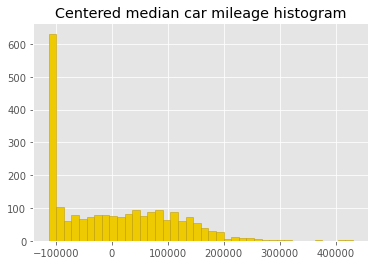

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.hist(data.c_mileage, bins = 40, color = DARK, edgecolor = DARK_HIGHLIGHT)
axes.set_title("Centered median car mileage histogram")
plt.plot()
print("Centered car mileage min: ", data.c_mileage.min())
print("Centered car mileage max: ", data.c_mileage.max())

Text(0.5, 1.0, 'Price histogram')

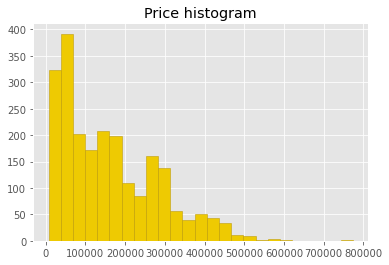

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.hist(data.price, bins = 25, color = DARK, edgecolor = DARK_HIGHLIGHT)
axes.set_title("Price histogram")

[]

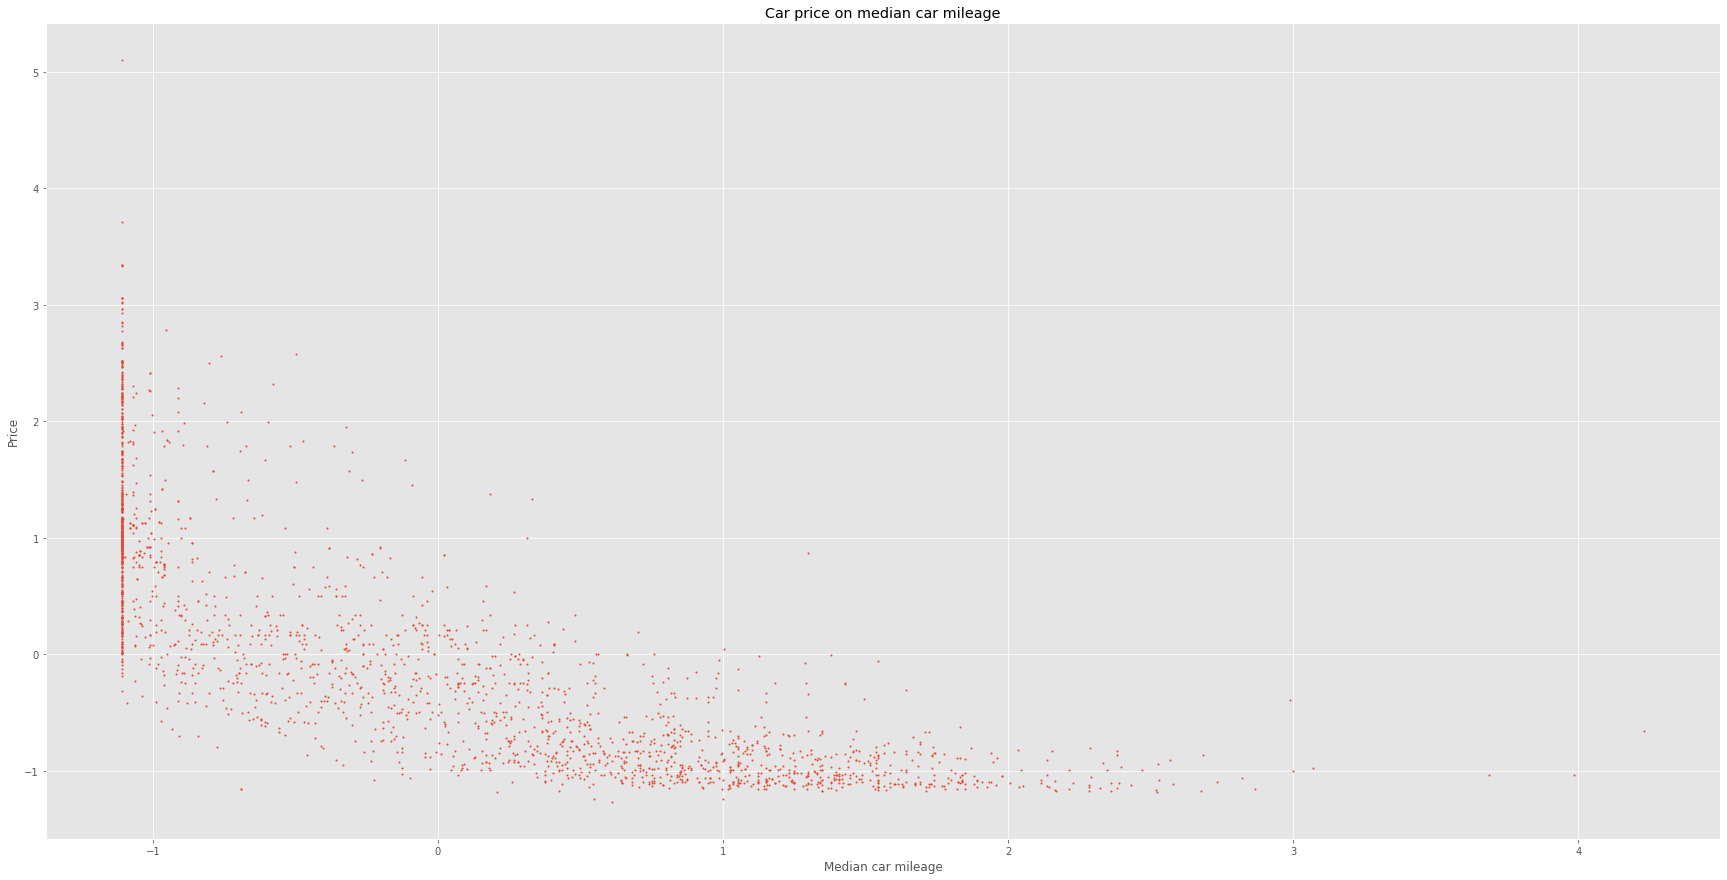

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(30, 15))
plt.plot(data.s_mileage, data.s_price, 'o', markersize=1)
axes.set_xlabel("Median car mileage")
axes.set_ylabel("Price")
axes.set_title("Car price on median car mileage")
plt.plot()

In [24]:
with open('cost_ppc.stan', 'r') as file: 
    print(file.read())

data { int N;
       real mileage[N];
}
generated quantities {
            real alpha = normal_rng(0,1);
            real beta = normal_rng(0,1);
            real sigma = exponential_rng(0.01);
            real price[N];
            for (i in 1:N) {
              price[i] = normal_rng(mileage[i]*beta+alpha,sigma);
            }
}



In [25]:
model_ppc=CmdStanModel(stan_file='cost_ppc.stan')
R = 1000
data_sim={'N': 50, 'mileage': np.linspace(data.s_mileage.min(),data.s_mileage.max())}
sim=model_ppc.sample(data=data_sim,
                        iter_sampling=R, 
                        iter_warmup=0, 
                        chains=1,
                        fixed_param=True, 
                        seed=29042020)

alpha_sim=sim.stan_variable('alpha')
beta_sim=sim.stan_variable('beta')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


[]

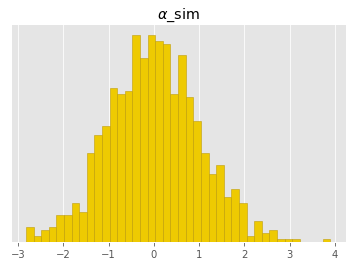

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(alpha_sim, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\alpha$_sim')
ax.set_yticks(())

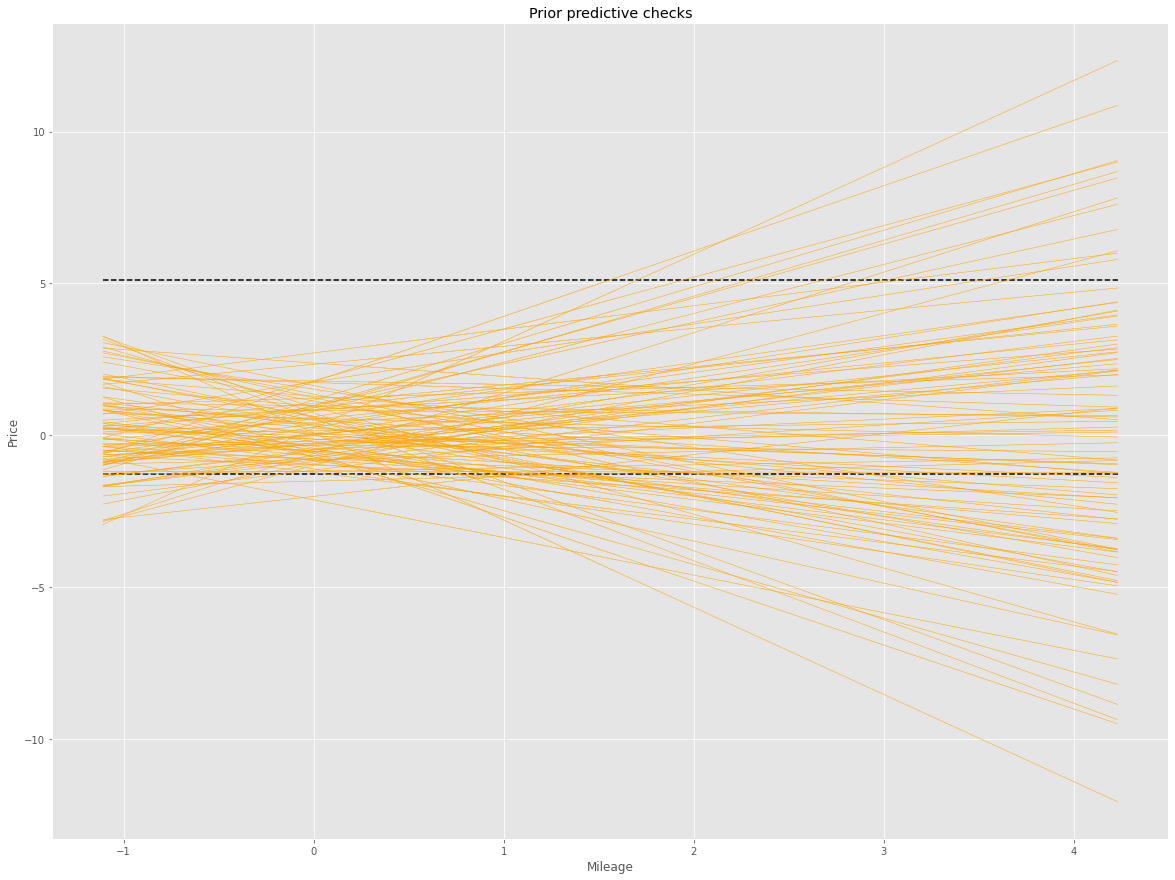

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
axes.hlines([data.s_price.min(), data.s_price.max()], xmin=data.s_mileage.min(),xmax=data.s_mileage.max(),linestyle='--',color='black')

for i in range(100):
    axes.plot(data.s_mileage, alpha_sim[i]+beta_sim[i]*data.s_mileage,color='orange',alpha=0.5,linewidth=0.5)
axes.set_xlabel('Mileage')
axes.set_ylabel('Price')
axes.set_title(r'Prior predictive checks')
axes.annotate(text='4mln PLN', xy=(10000,4100000))
plt.show()

Model u gory nie ma sensu, duzo hajsu jest ponizej 0 co nijak przeklada sie na rzeczywistosc, trzbea zmienic funckje dystrybucji z normal na lognormal

In [51]:
with open('cost_ppc_improved.stan', 'r') as file: 
    print(file.read())

data { int N;
       real mileage[N];
}
generated quantities {
            real alpha = normal_rng(0.5,1);
            real beta = -0.5*lognormal_rng(-1,1);
            real <lower = 0> sigma = exponential_rng(0.5); # variable that provide better ribbon plot
            real price[N];
            for (i in 1:N) {
              price[i] = normal_rng(mileage[i]*beta+alpha,sigma);
            }
}




In [52]:
model_ppc=CmdStanModel(stan_file='cost_ppc_improved.stan')
R = 1000
data_sim={'N': 50, 'mileage': np.linspace(data.s_mileage.min(),data.s_mileage.max())}
sim=model_ppc.sample(data=data_sim,
                        iter_sampling=R, 
                        iter_warmup=0, 
                        chains=1,
                        fixed_param=True, 
                        seed=29042020)

alpha_sim_improved=sim.stan_variable('alpha')
beta_sim_improved=sim.stan_variable('beta')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan', line 2, column 7: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_ppc_improved.stan', line


INFO:cmdstanpy:CmdStan done processing.


[]

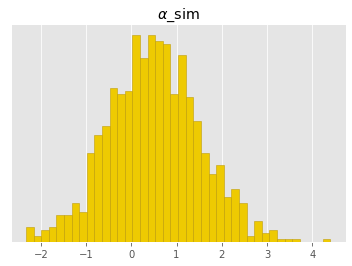

In [53]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(alpha_sim_improved, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\alpha$_sim')
ax.set_yticks(())

[]

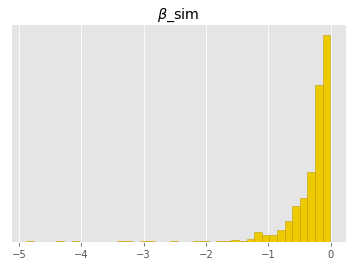

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes 
ax.hist(beta_sim_improved, bins=40, color=DARK, edgecolor=DARK_HIGHLIGHT, density=True) 
ax.set_title(r'$\beta$_sim')
ax.set_yticks(())

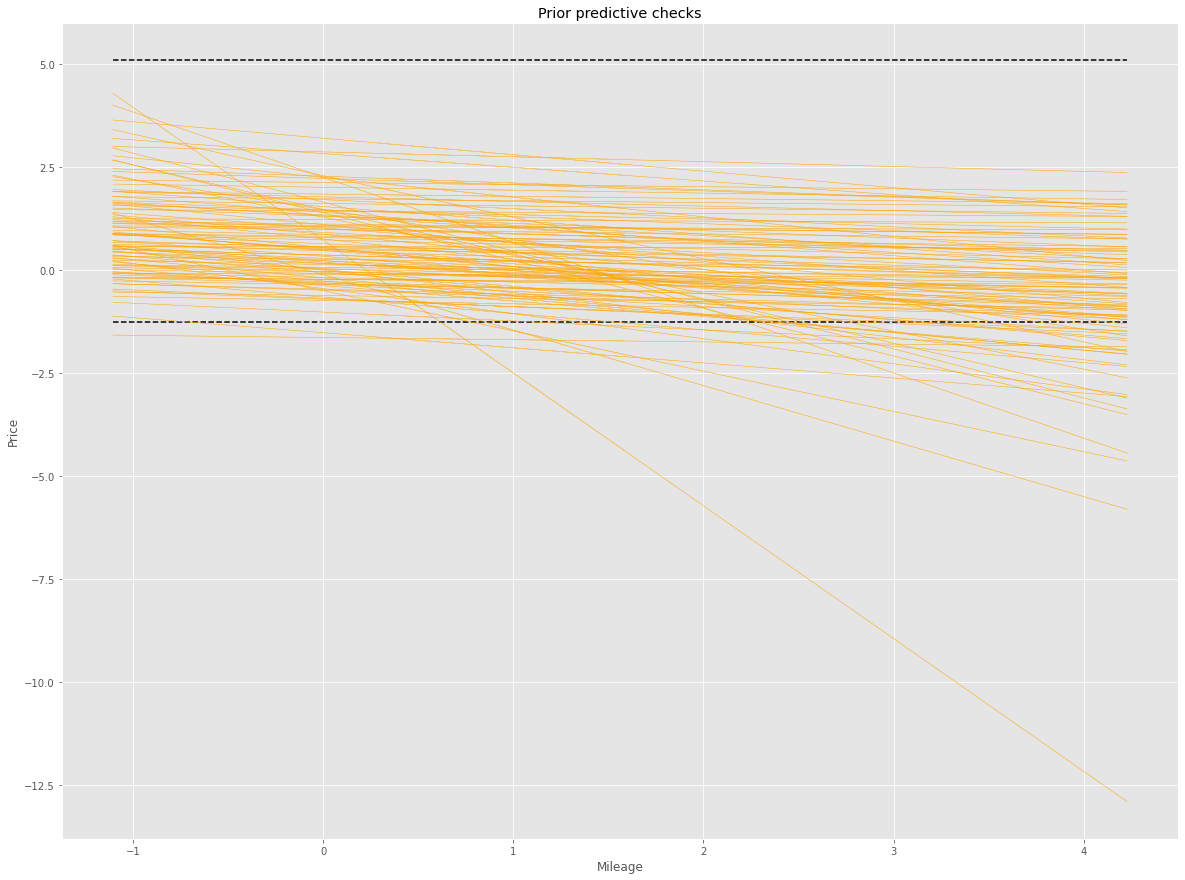

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
axes.hlines([data.s_price.min(), data.s_price.max()], xmin=data.s_mileage.min(),xmax=data.s_mileage.max(),linestyle='--',color='black')
for i in range(100):
    axes.plot(data.s_mileage, alpha_sim_improved[i]+beta_sim_improved[i]*data.s_mileage,color='orange',alpha=0.5,linewidth=0.5)
axes.set_xlabel('Mileage')
axes.set_ylabel('Price')
axes.set_title(r'Prior predictive checks')
axes.annotate(text='2mln PLN', xy=(10000,2100000))
plt.show()

In [56]:
az.summary(sim,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')


mean    sd  hdi_3%  hdi_97%
alpha  0.50  1.01   -1.23     2.49
beta  -0.31  0.42   -0.86    -0.01
sigma  1.97  1.94    0.00     5.63

O WIELE LEPIEJ TO WYGLADA JUZ

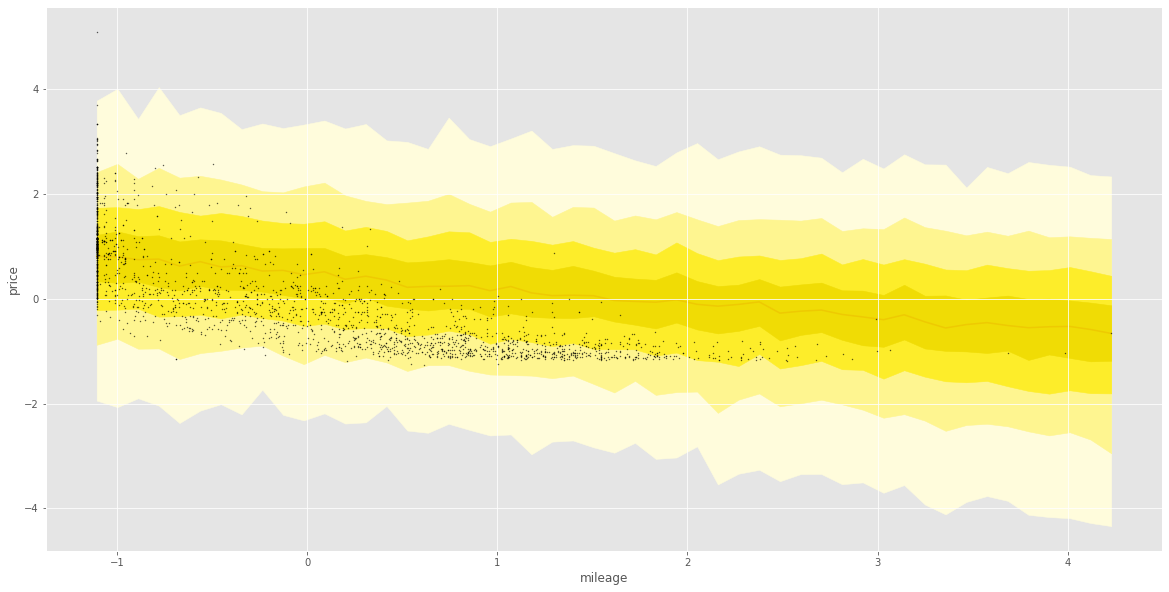

In [61]:
price_sim=sim.stan_variable('price')
fig, axes = plt.subplots(1, 1, figsize=(20,10))
axes=ribbon_plot(data_sim['mileage'] + data.s_mileage.mean(), price_sim, axes)
axes.scatter(data.s_mileage, data.s_price, color='black', alpha=0.5, s=1)
axes.set_xlabel('mileage')
axes.set_ylabel('price')
plt.show()

### KOLEJNY PREDICTOR

In [82]:
with open('vol_engine_ppc.stan', 'r') as file: 
    print(file.read())

data { int N;
       real vol_engine[N];
}
generated quantities {
            real alpha = normal_rng(0.7,1);
            real beta = 0.5*lognormal_rng(-1,1);
            real <lower = 0> sigma = exponential_rng(0.6); # variable that provide better ribbon plot
            real price[N];
            for (i in 1:N) {
              price[i] = normal_rng(vol_engine[i]*beta+alpha,sigma);
            }
}





In [83]:
model_vol_engine_ppc=CmdStanModel(stan_file='vol_engine_ppc.stan')
R = 1000
data_sim={'N': 50, 'vol_engine': np.linspace(data.s_vol_engine.min(),data.s_vol_engine.max())}
sim=model_vol_engine_ppc.sample(data=data_sim,
                        iter_sampling=R, 
                        iter_warmup=0, 
                        chains=1,
                        fixed_param=True, 
                        seed=29042020)

alpha_sim_improved=sim.stan_variable('alpha')
beta_sim_improved=sim.stan_variable('beta')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc.stan', line 2, column 7: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/vol_engine_ppc.stan', line 7, column 59: Commen


INFO:cmdstanpy:CmdStan done processing.


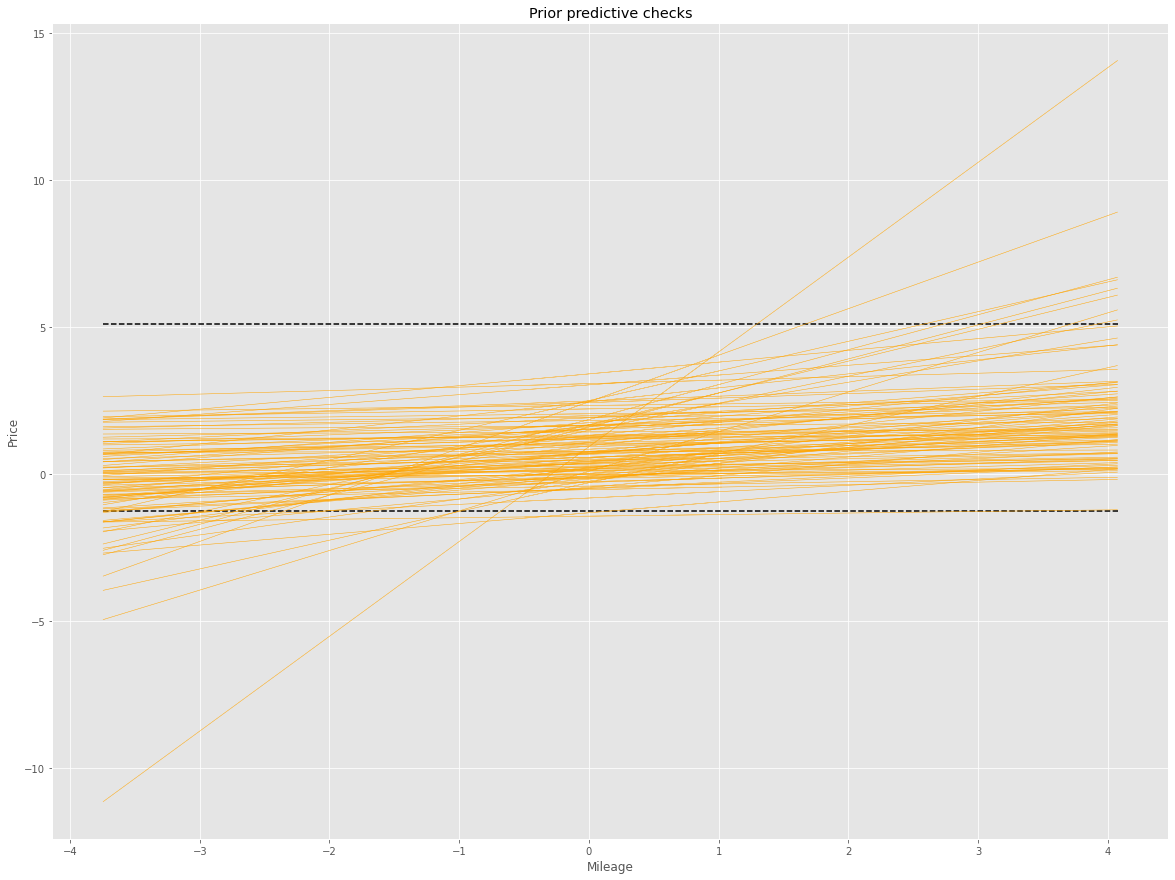

In [84]:
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
axes.hlines([data.s_price.min(), data.s_price.max()], xmin=data.s_vol_engine.min(),xmax=data.s_vol_engine.max(),linestyle='--',color='black')
for i in range(100):
    axes.plot(data.s_vol_engine, alpha_sim_improved[i]+beta_sim_improved[i]*data.s_vol_engine,color='orange',alpha=0.5,linewidth=0.5)
axes.set_xlabel('Mileage')
axes.set_ylabel('Price')
axes.set_title(r'Prior predictive checks')
axes.annotate(text='2mln PLN', xy=(10000,2100000))
plt.show()

In [87]:
az.summary(sim,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')

mean    sd  hdi_3%  hdi_97%
alpha  0.70  1.01   -1.03     2.69
beta   0.31  0.42    0.01     0.86
sigma  1.64  1.62    0.00     4.70

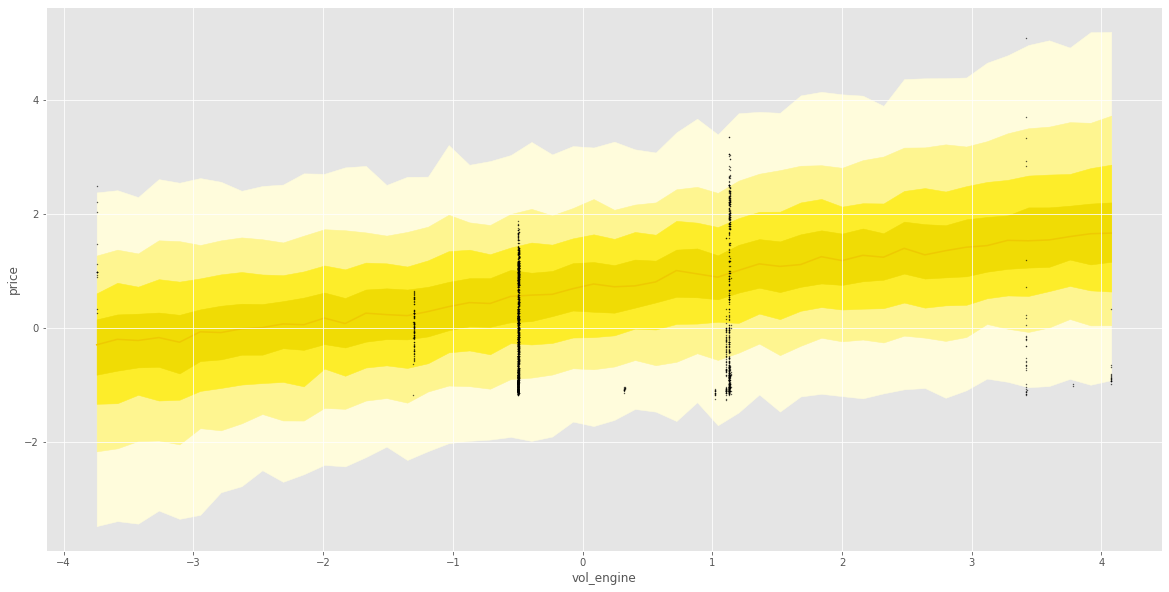

In [86]:
price_sim=sim.stan_variable('price')
fig, axes = plt.subplots(1, 1, figsize=(20,10))
axes=ribbon_plot(data_sim['vol_engine'] + data.s_vol_engine.mean(), price_sim, axes)
axes.scatter(data.s_vol_engine, data.s_price, color='black', alpha=0.5, s=1)
axes.set_xlabel('vol_engine')
axes.set_ylabel('price')
plt.show()

In [103]:
with open('cost_2_fit.stan', 'r') as file: 
    print(file.read())

data { 
    int N;
    vector[N] mileage;
    real price[N];
}

parameters {
            real alpha;
            real beta;
            real<lower=0> sigma;
}
          
transformed parameters {
            vector[N] mu = mileage*(-beta)+alpha;
}

model {
        alpha ~ normal(0.5,1);
        beta ~ lognormal(-1,1);
        sigma ~ exponential(0.5);
        price ~ normal(mu,sigma);
}

generated quantities {
                    real prices[N];
                    real log_lik[N];
                    for (i in 1:N) {
                      prices[i] = normal_rng(mu[i],sigma);
                      log_lik[i] = normal_lpdf(price[i] | mu[i], sigma);
                    }
}


In [104]:
model_2_fit=CmdStanModel(stan_file='cost_2_fit.stan') 
model_2_fit.compile(force=False)
d_short=data.head(1000)
data_fit=dict(N=len(d_short),
              mileage=d_short.s_mileage.values,
              price=d_short.s_price.values)
fit=model_2_fit.sample(data=data_fit,seed=28052020)
alpha_fit=fit.stan_variable('alpha')
beta_fit=fit.stan_variable('beta')
mu_fit=fit.stan_variable('mu')
price_pred=fit.stan_variable('prices')
log_lik=fit.stan_variable('log_lik')
az.summary(fit,var_names=['alpha','beta','sigma'],round_to=2,kind='stats')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_2_fit.stan', line 25, column 20: Declaration
    of arrays by plac


INFO:cmdstanpy:CmdStan done processing.


mean    sd  hdi_3%  hdi_97%
alpha -0.30  0.01   -0.33    -0.28
beta   0.70  0.02    0.67     0.73
sigma  0.41  0.01    0.39     0.43

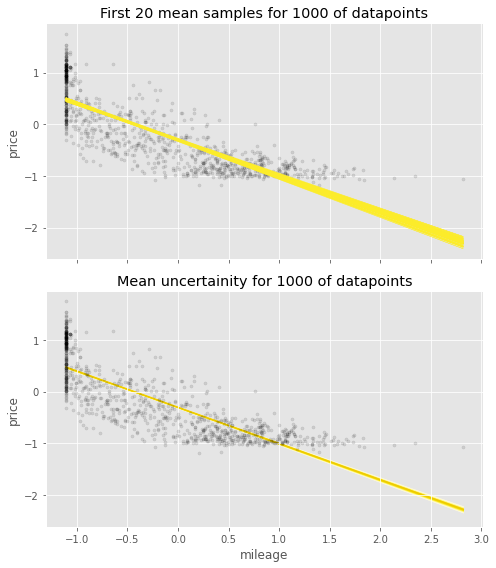

In [105]:
fig, axes = plt.subplots(2,1, figsize=(7, 8),sharey=True,sharex=True) 
ax0=axes[0]
for i in range(100):
    ax0.plot(d_short.s_mileage,
              alpha_fit[i]-beta_fit[i]*d_short.s_mileage,
                color=MID,
                alpha=0.5,linewidth=0.5) 
ax0.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(d_short))) 
ax0.set_ylabel('price')
ax1=axes[1]
ax1=ribbon_plot(d_short.s_mileage.values,mu_fit,ax1,supress_warning=True) 
ax1.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax1.set_xlabel('mileage')
ax1.set_ylabel('price')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(d_short))) 
fig.tight_layout()
plt.show()

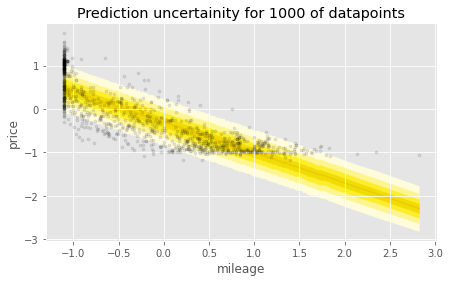

In [106]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
axes = ribbon_plot(d_short.s_mileage.values,price_pred,axes,supress_warning=True) 
axes.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
axes.set_xlabel('mileage')
axes.set_ylabel('price')
axes.set_title('Prediction uncertainity for {} of datapoints'.format(len(d_short))) 
plt.show()

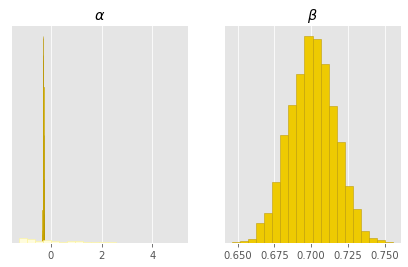

In [107]:
ig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax = axes[0] 
ax.hist(alpha_fit,bins=20,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax.hist(data.s_price,bins=20,color=LIGHT,edgecolor=LIGHT_HIGHLIGHT,density=True) 
ax.set_title(r'$\alpha$')
ax.set_yticks(())
ax2 = axes[1] 
ax2.hist(beta_fit,bins=20,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

Adding second predictor - BMI

In [109]:
with open('cost_3_fit.stan', 'r') as file: 
    print(file.read())

data { int N;
  vector[N] mileage;
  vector[N] vol_engine;
  real price[N];
}

parameters {
  real alpha;
  real beta_mileage;
  real beta_vol_engine;
  real<lower=0> sigma;
}

transformed parameters {
  vector[N] mu = mileage*(-0.5*beta_mileage)+vol_engine*(-0.5*beta_vol_engine)+alpha;
}

model {
  alpha ~ normal(1.5,1);
  beta_mileage ~ lognormal(-1,1);
  beta_vol_engine ~ lognormal(-1, 1);
  sigma ~ exponential(0.5);
  price ~ normal(mu,sigma);
}

generated quantities {
  real prices[N];
  real log_lik[N];
  for (i in 1:N) {
    prices[i] = normal_rng(mu[i],sigma);
    log_lik[i] = normal_lpdf(price[i] | mu[i], sigma);
  }
}


In [110]:
model_3_fit=CmdStanModel(stan_file='cost_3_fit.stan') 
model_3_fit.compile(force=False)
d_short=data.head(1000)
data_fit=dict(N=len(d_short),
              mileage=d_short.s_mileage.values,
              vol_engine=d_short.s_vol_engine.values,
              price=d_short.s_price.values)

fit_2 = model_3_fit.sample(data=data_fit,seed=28052020)
alpha_fit = fit_2.stan_variable('alpha')
beta_mileage_fit = fit_2.stan_variable('beta_mileage')
beta_vol_engine_fit = fit_2.stan_variable('beta_vol_engine')


mu_fit_2 = fit_2.stan_variable('mu')
price_pred_2 = fit_2.stan_variable('prices')
log_lik = fit_2.stan_variable('log_lik')
az.summary(fit_2,var_names=['alpha','beta_mileage','beta_vol_engine','sigma'],round_to=2,kind='stats')
# Values are standarized so we can see that Age variable is much more important by looking at mean for both betas in
#summary below

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit.stan to exe file /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit.hpp /Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit.stan
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/kamilbaradziej/PythonProjects/ModellingofCarPrices/cost_3_fit.stan', line 27, column 2: Declaration
    of arrays by placi

chain 1 |█████████████████████████████████████████████| 00:03 Sampling completed
chain 2 |█████████████████████████████████████████████| 00:03 Sampling completed
chain 3 |█████████████████████████████████████████████| 00:03 Sampling completed
chain 4 |█████████████████████████████████████████████| 00:03 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


mean    sd  hdi_3%  hdi_97%
alpha           -0.31  0.01   -0.34    -0.28
beta_mileage     1.40  0.03    1.34     1.46
beta_vol_engine  0.03  0.01    0.01     0.05
sigma            0.41  0.01    0.39     0.43

In [112]:
az.summary(fit_2,var_names=['alpha','beta_mileage','beta_vol_engine', 'sigma'],
           round_to=2,kind='stats')



mean    sd  hdi_3%  hdi_97%
alpha           -0.31  0.01   -0.34    -0.28
beta_mileage     1.40  0.03    1.34     1.46
beta_vol_engine  0.03  0.01    0.01     0.05
sigma            0.41  0.01    0.39     0.43

In [113]:
log_lik

array([[-0.684537 , -0.573839 , -1.59199  , ..., -0.315415 , -0.62859  ,
        -0.094146 ],
       [-0.605123 , -0.502974 , -1.46577  , ..., -0.392626 , -0.743025 ,
        -0.123813 ],
       [-0.719105 , -0.598808 , -1.70158  , ..., -0.287612 , -0.616257 ,
        -0.0581796],
       ...,
       [-0.678602 , -0.579666 , -1.53307  , ..., -0.415079 , -0.771134 ,
        -0.119912 ],
       [-0.585585 , -0.472031 , -1.50449  , ..., -0.297378 , -0.609426 ,
        -0.0982002],
       [-0.710219 , -0.602501 , -1.61404  , ..., -0.348664 , -0.683602 ,
        -0.0920406]])

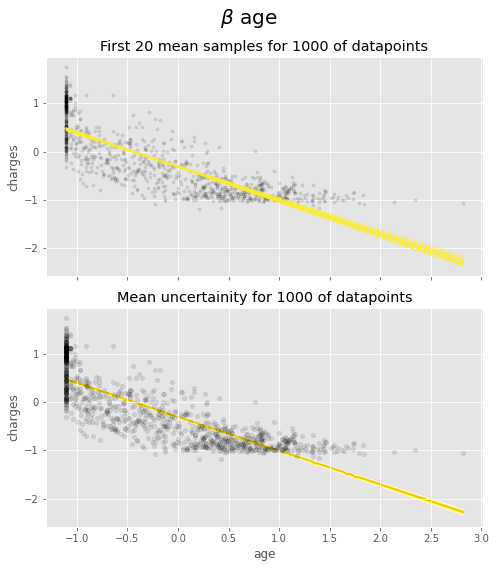

In [114]:
fig, axes = plt.subplots(2,1, figsize=(7, 8),sharey=True,sharex=True) 
ax0=axes[0]
for i in range(20):
    ax0.plot(d_short.s_mileage,
              alpha_fit[i]-0.5*beta_mileage_fit[i]*d_short.s_mileage,
              color=MID,
              alpha=0.5,linewidth=0.5)
ax0.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=10) 
ax0.set_title('First 20 mean samples for {} of datapoints'.format(len(d_short))) 
fig.suptitle(r'$\beta$ age', fontsize=20)
ax0.set_ylabel('charges')
ax1=axes[1] 
ax1=ribbon_plot(d_short.s_mileage.values,mu_fit_2,ax1,supress_warning=True) 
ax1.scatter(d_short.s_mileage,d_short.s_price,color='black',alpha=0.1,s=20) 
ax1.set_xlabel('age')
ax1.set_ylabel('charges')
ax1.set_title('Mean uncertainity for {} of datapoints'.format(len(d_short))) 
fig.tight_layout()
plt.show()

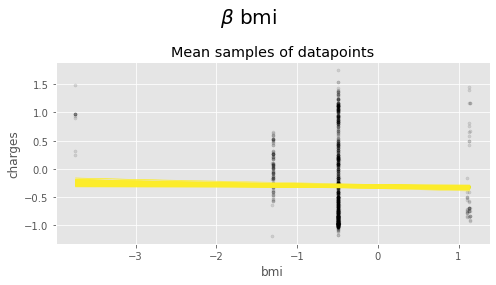

In [115]:
fig, axes = plt.subplots(1,1, figsize=(7, 4),sharey=True,sharex=True) 
for i in range(459):
    axes.plot(d_short.s_vol_engine,
              alpha_fit[i]-0.5*beta_vol_engine_fit[i]*d_short.s_vol_engine,
              color=MID,
              alpha=0.5,linewidth=0.5)
axes.scatter(d_short.s_vol_engine,d_short.s_price,color='black',alpha=0.1,s=10)
axes.set_title('Mean samples of datapoints'.format(len(d_short)))
fig.suptitle(r'$\beta$ bmi', fontsize=20)
axes.set_ylabel('charges')
axes.set_xlabel('bmi')
fig.tight_layout()
plt.show()
# beta for BMI parameter is very close to 0 and insignificant

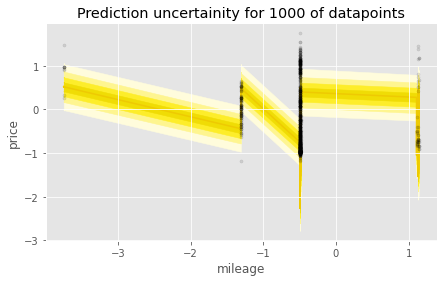

In [116]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
axes = ribbon_plot(d_short.s_vol_engine.values,price_pred_2,axes,supress_warning=True) 
axes.scatter(d_short.s_vol_engine,d_short.s_price,color='black',alpha=0.1,s=10) 
axes.set_xlabel('mileage')
axes.set_ylabel('price')
axes.set_title('Prediction uncertainity for {} of datapoints'.format(len(d_short))) 
plt.show()

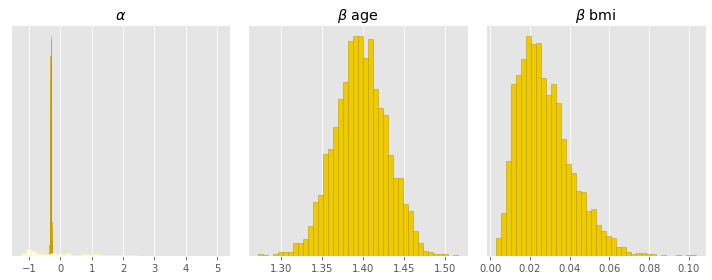

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
ax = axes[0] 
ax.hist(alpha_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax.hist(data.s_price,bins=40,color=LIGHT,edgecolor=LIGHT_HIGHLIGHT,density=True) 
ax.set_title(r'$\alpha$')
ax.set_yticks(())
ax2 = axes[1] 
ax2.hist(beta_mileage_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$ age')
ax2.set_yticks(())
fig.tight_layout()
ax2 = axes[2] 
ax2.hist(beta_vol_engine_fit,bins=40,color=DARK,edgecolor=DARK_HIGHLIGHT,density=True) 
ax2.set_title(r'$\beta$ bmi')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

Comparing models

In [118]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = fit, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = fit_2, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "loo") # loo stands for leave one out cross validation

rank         loo     p_loo     d_loo        weight         se  \
model_1     0 -522.544575  2.901543  0.000000  1.000000e+00  20.120624   
model_2     1 -525.121306  3.064495  2.576731  2.220446e-15  20.157935   

              dse  warning loo_scale  
model_1  0.000000    False       log  
model_2  0.680364    False       log

In [119]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = fit, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = fit_2, log_likelihood = "log_lik") 
compare_dict = {"model_1": idata1, "model_2": idata2}
az.compare(compare_dict, ic = "waic") # loo stands for leave one out cross validation

rank        waic    p_waic    d_waic  weight         se       dse  \
model_1     0 -522.544850  2.901818  0.000000     1.0  20.120667  0.000000   
model_2     1 -525.120935  3.064124  2.576084     0.0  20.157873  0.680415   

         warning waic_scale  
model_1    False        log  
model_2    False        log

<AxesSubplot:xlabel='Log'>

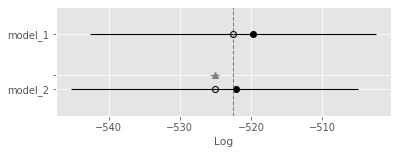

In [120]:
az.plot_compare(az.compare(compare_dict))
